<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS

<ipython-input-2-8da3b31b3ba2>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


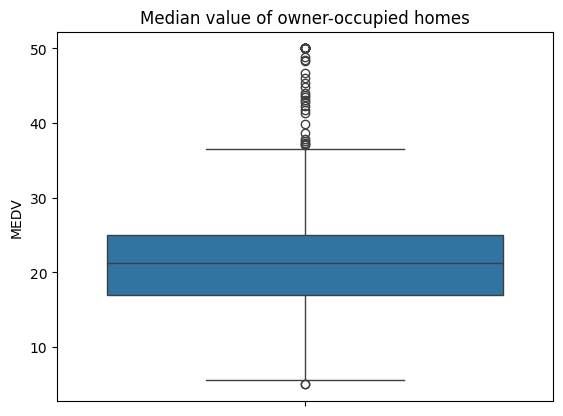

In [6]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(boston_df['MEDV'])
pyplot.title("Median value of owner-occupied homes")
pyplot.show()

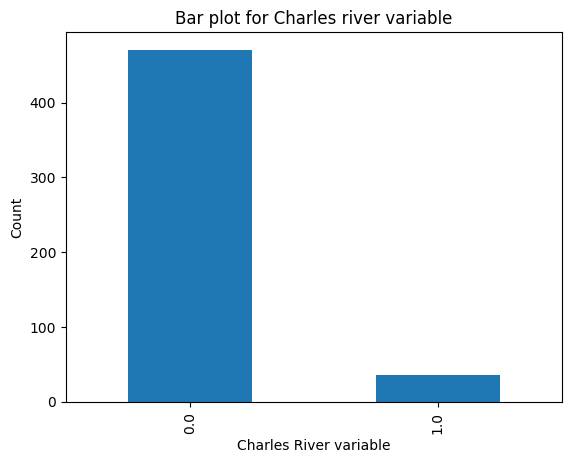

In [7]:
# Provide a bar plot for the Charles river variable
boston_df['CHAS'].value_counts().plot(kind='bar')
pyplot.title('Bar plot for Charles river variable')
pyplot.xlabel('Charles River variable')
pyplot.ylabel('Count')
pyplot.show()

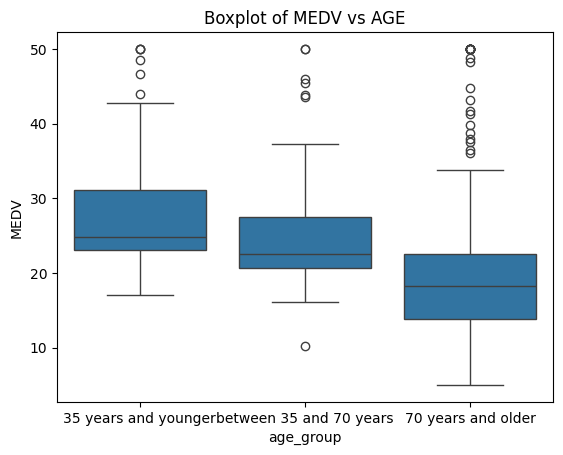

In [8]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])  
sns.boxplot(x='age_group', y='MEDV', data=boston_df)  
pyplot.title('Boxplot of MEDV vs AGE')  
pyplot.show()  

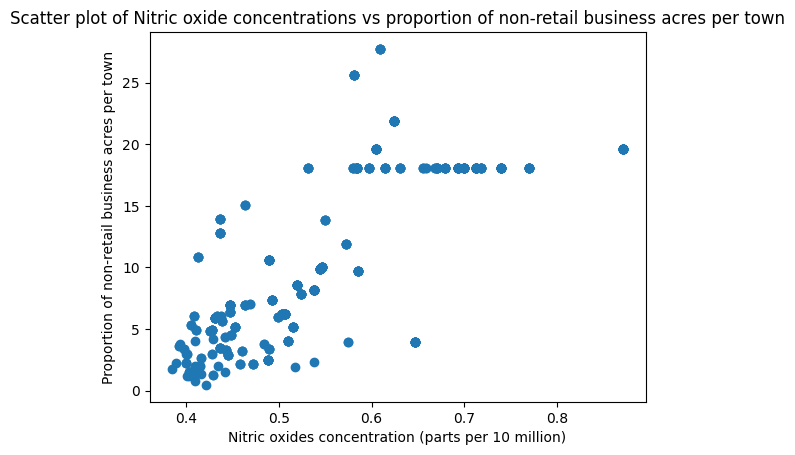

In [9]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

pyplot.scatter(boston_df['NOX'], boston_df['INDUS'])
pyplot.title('Scatter plot of Nitric oxide concentrations vs proportion of non-retail business acres per town')
pyplot.xlabel('Nitric oxides concentration (parts per 10 million)')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.show()

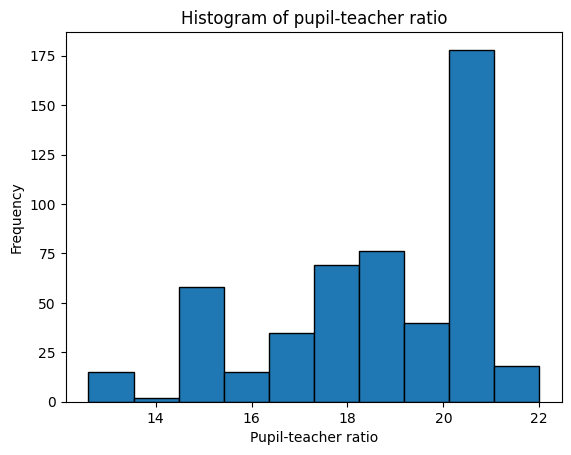

In [10]:
# Create a histogram for the pupil to teacher ratio variable

boston_df['PTRATIO'].plot(kind='hist', edgecolor='black')
pyplot.title('Histogram of pupil-teacher ratio')
pyplot.xlabel('Pupil-teacher ratio')
pyplot.show()

In [11]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

group1 = boston_df[boston_df['CHAS'] == 0]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = stats.ttest_ind(group1, group2)

if p_val < 0.05:
    print(f'With a p-value of {p_val}, we reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river or not.')
else:
    print(f'With a p-value of {p_val}, we fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles river or not.')

With a p-value of 7.390623170519905e-05, we reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river or not.


In [12]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

model = ols('MEDV ~ AGE', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

if anova_table["PR(>F)"][0] < 0.05:
    print('We reject the null hypothesis. There is a significant difference in the median values of houses for each proportion of owner occupied units built prior to 1940.')
else:
    print('We fail to reject the null hypothesis. There is no significant difference in the median values of houses for each proportion of owner occupied units built prior to 1940.')

<ipython-input-12-17d043b7c722>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table["PR(>F)"][0] < 0.05:


We reject the null hypothesis. There is a significant difference in the median values of houses for each proportion of owner occupied units built prior to 1940.


In [13]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

corr, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

if p_val < 0.05:
    print('We reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.')
else:
    print('We fail to reject the null hypothesis. There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.')

We reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [14]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

X = boston_df['DIS']
Y = boston_df['MEDV']
  
model = OLS(Y, sm.add_constant(X)).fit()
summary = model.summary()

print(summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        15:02:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""